In [2]:
# NO CODE
from prob140 import *
from datascience import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

## Random Variables ##

Random numerical quantities such as "the number of heads in ten tosses of a coin" are called random variables. The terminology and notation of random variables helps reduce the amount of writing involved in phrases like "the chance that there are no more than 4 heads in ten tosses of a coin."

Formally, suppose you have an outcome space $\Omega$. A *random variable* is a numerical function on $\Omega$. That is, a random variable is a function whose domain is $\Omega$ and whose range is the number line.

### Number of Heads in Three Tosses ###

As our first example, we will formally define a random count: the number of heads in three tosses of a coin.

The outcome space is

$$
\Omega ~ = ~ \{ HHH, HHT, HTH, THH, HTT, THT, TTH, TTT \}
$$

Random variables are typically denoted by upper case letters, often late letters in the alphabet.

So let the random variable $X$ be the number of heads in three tosses. For every outcome, $X$ counts the number of heads in the outcome, as shown in the table below.

|$\text{outcome}$|$X(\text{outcome})$|
|:-----:|---------------------------:|
|HHH    |$~~~~~~~~~~~~~~~~~~~~~~3$   |
|HHT    |2                           |
|HTH    |2                           |
|THH    |2                           |
|HTT    |1                           |
|THT    |1                           |
|TTH    |1                           |
|TTT    |0                           |

The *possible values* of $X$ are $0, 1, 2, 3$, because those are the numbers of heads you can get if you toss a coin three times. 

Now let's introduce probabilities. The coin is fair, so all outcomes are equally likely.

|$\text{outcome}$|$X(\text{outcome})$|$\text{Probability}$|
|:-----:|---------------------------:|:------------------:|
|HHH    |$~~~~~~~~~~~~~~~~~~~~~~3$   |1/8                 |
|HHT    |2                           |1/8                 |
|HTH    |2                           |1/8                 |
|THH    |2                           |1/8                 |
|HTT    |1                           |1/8                 |
|THT    |1                           |1/8                 |
|TTH    |1                           |1/8                 |
|TTT    |0                           |1/8                 |

There is only one outcome (HHH) for which the number of heads is 3. The chance of that outcome is 1/8, so we say, "The chance of three heads is 1/8." And we write

$$
P(X = 3) ~ = ~ 1/8
$$

There are three outcomes (HHT, HTH, THH) for which the number of heads is two. The chance of getting two heads is the *total chance* of these three outcomes:

$$
P(X = 2) ~ = ~ 3/8
$$

Similarly,

$$
P(X = 1) ~ = ~ 3/8
$$

and

$$
P(X = 0) ~ = ~ 1/8
$$

We can display all this information more compactly in a *probability distribution table* for $X$, known for short as a distribution table.

|$\text{Possible value } x$|$~~0~~$|$~~1~~$|$~~2~~$|$~~3~~$|
|-------------------------:|:-----:|:-----:|:-----:|:-----:|
|$P(X = x)$               |$1/8$   |$3/8$  |$3/8$  |$1/8$  |

Notice the lower case letter $x$ as notation for a generic possible value of $X$. Keep in mind that $X$ is the name of the random variable whereas $x$ is a number. 

For the generic value of $X$, you don't have to use $x$ as the notation. You can use any letter you like, but it should be lower case as upper case is used for events and random variables.

### Distribution (pmf) ###
The *probability distribution* of a random variable, or distribution for short, is the set of all possible values of the random variables along with all of the corresponding probabilities.

When random variables have a finite number of possible values, as in the case of our example $X$, the distribution can be displayed in a table. The probabilities can also be written in a formula, as we will see in the next section.

The probabilities in a distribution must add up to 1. 

This is clear because $X$ has to have one of the possible values and it can't have two values at once. So by the addition rule, the total chance of all the values should be the chance of the set of all outcomes, which is 1.

The distribution of a random variable is sometimes called a *probability mass function*, abbreviated to *pmf*. That is because some probabilists like to visualize probabilities as masses attached to the possible values.

### Probability Histogram ###
The probability histogram is a natural way to visualize the distribution of a random variable. In a histogram, the areas of the bars represent probabilities. Later in the course we will see why this is important.

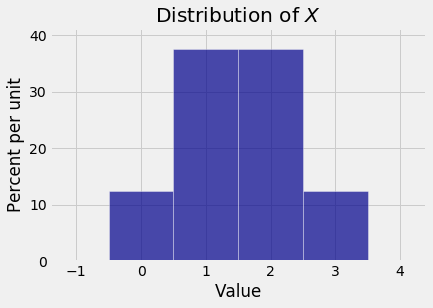

In [3]:
# NO CODE

k = range(4)
probs = stats.binom.pmf(k, 3, 0.5)
h_3 = Table().values(k).probabilities(probs)
Plot(h_3)
plt.title('Distribution of $X$');

### Probabilities ###
Once you have the distribution of a random variable, you can find the chance of any event determined by the random variable. Just identify the possible values that are in the event, and add up all their chances. 

For example, 

$$
\begin{align*}
P(X > 0) ~ &= ~ P(X = 1) + P(X = 2) + P(X = 3)\\
&= ~ \frac{3}{8} + \frac{3}{8} + \frac{1}{8} ~ = ~ \frac{7}{8}
\end{align*}
$$

This could also have been calculated as

$$
P(X > 0) ~ = ~ 1 - P(X = 0) ~ = ~ 1 - \frac{1}{8} ~ = ~ \frac{7}{8}
$$

As you can see, the only thing new in these calculations is the notation.

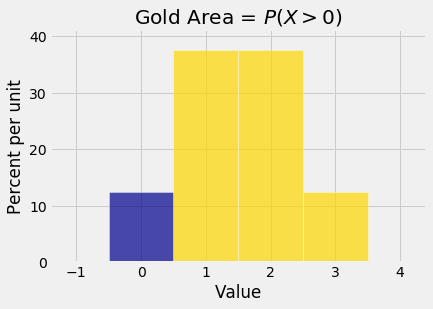

In [5]:
# NO CODE

Plot(h_3, event = range(1, 4))
plt.title('Gold Area = $P(X > 0)$');

### Equality ###
There is one important new idea to keep in mind when studying random variables, which is that random variables have two different kinds of equality.

Rather than talk in generalities, let's look at an example. Consider rolling two dice. Let $D_1$ be the number on the first roll and $D_2$ the number on the second. For example, if the outcome of the two rolls is the pair $(4, 3)$ then $D_1((4, 3)) = 4$ and $D_2((4, 3)) = 3$.

This shows that as functions on the outcome space, $D_1$ and $D_2$ are *not equal*. For the outcome $(4, 3)$, the value of $D_1$ is different from the value of $D_2$.

However, $D_1$ and $D_2$ clearly have something in common. *They have the same distribution,* shown in the table below.

|$\text{Possible value }$|$~~1~~$|$~~2~~$|$~~3~~$|$~~4~~$|$~~5~~$|$~~6~~$|
|-------------------------:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|$\text{Probability}$      |$1/6$   |$1/6$  |$1/6$  |$1/6$  |$1/6$  |$1/6$ |

This is called the *uniform distribution* on $\{1, 2, 3, 4, 5, 6 \}$.

We say that $D_1$ and $D_2$ are equal in distribution. But remember: they are not equal.